<a href="https://colab.research.google.com/github/jelade/Jaleel/blob/master/Group_work_MFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats 
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/home/diouma/Documents/Mathematical Finance with Python/AAPL.csv')
data

,High,Low,Open,Close,Volume,Adj Close
0,43.075001,42.314999,42.540001,43.064999,102223600.0,41.380238
1,43.637501,42.990002,43.132500,43.057499,118071600.0,41.373032
2,43.367500,43.020000,43.134998,43.257500,89738400.0,41.565216
3,43.842499,43.262501,43.360001,43.750000,94640000.0,42.038452
4,43.902500,43.482498,43.587502,43.587502,82271200.0,41.882305
...,...,...,...,...,...,...
751,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
752,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
753,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762
754,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477


In [ ]:
data.shape

(756, 6)

In [ ]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000
mean,65.687440,64.154517,64.901078,64.955076,1.352900e+08,64.039674
std,26.140361,25.265343,25.750101,25.717217,6.107473e+07,26.054833
min,36.430000,35.500000,35.994999,35.547501,4.544800e+07,34.669640
25%,46.900624,46.174999,46.526875,46.525624,9.311270e+07,45.182574
50%,54.834999,53.375000,54.127501,53.938751,1.208860e+08,52.563511
75%,78.218752,76.302502,77.147501,77.390627,1.613882e+08,76.673529
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.486053


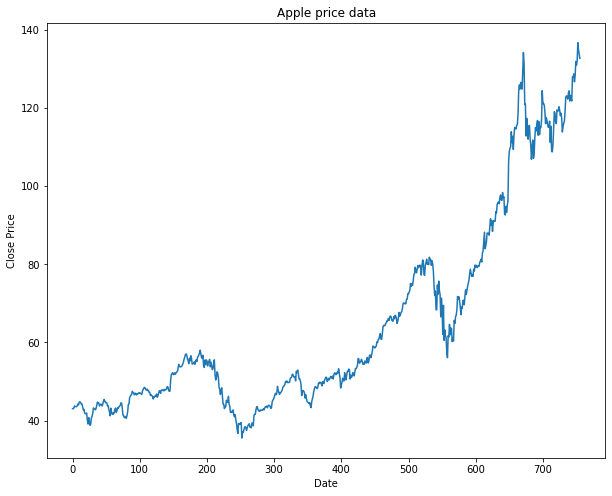

In [ ]:
plt.figure(figsize=(10,8))
data["Close"].plot()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Apple price data")
plt.show()

In [ ]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### 1) Let's compute the daily log-returns of the asset, defined to be $r_i=\log\left(S_{i+1}/S_i\right)$ where $S_i$ is the closing price of the asset on the $i^{th}$ day.

In [ ]:
r=[]
for i in range(data.shape[0]-1):
    r_i=np.log(data.Close[i+1]/data.Close[i])
    r.append(r_i)
print(r)

[-0.00017416343129299762, 0.004634214772755386, 0.01132099110982105, -0.003721165794595393, -0.00011474287041224705, -0.00022952524615844756, 0.005664148310559515, 0.01027336891843143, -0.005095085182133711, 0.01638137108627444, 0.0008928921401781262, -0.004472711192521281, -0.008214791519307336, 0.0002259252460815553, -0.016056782422488546, -0.018012247286530253, 0.0023349138048535055, -0.020915646126741017, -0.005911732917225749, 0.002751146851711774, 0.0020882804190405645, -0.04435964757246036, -0.025301797292657732, 0.04094208018655196, -0.021639593063639776, -0.02790228084538627, 0.008088436544735648, 0.0394887283143338, 0.009967913805295886, 0.018269471132480272, 0.0330269197613298, -0.003242506577551034, -0.0033692757231914747, -0.004549166534010014, 0.00832436419305261, 0.017241806434505954, 0.019579157944110165, -0.0032460395082993215, -0.0015147083012800758, -0.01767147911693719, 0.006890529758635103, 0.0034558037173992354, -0.0008487321392243571, -0.009326194431830744, 0.010

### 2) Let's compute the sample mean $m̂$ and standard deviation $v̂$ for the daily log-returns.

In [ ]:
mean =np.mean(r)
std =np.std(r)
print('𝑚̂ = ', mean)
print('v̂ = ', std)

𝑚̂ =  0.0014904702365501055
v̂ =  0.022142277299627755


### 3) Let's plot a histogram of our data

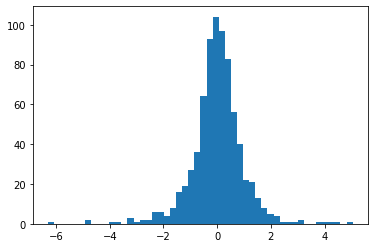

In [ ]:
r_scaled=(r-mean)/std
plt.hist(r_scaled, bins = 50)
plt.show()

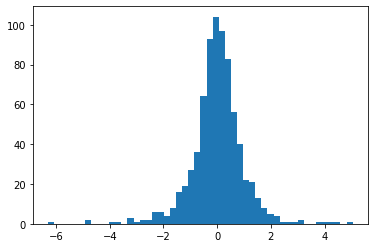

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
r_scaled= scale.fit_transform(pd.DataFrame(r))
plt.hist(r_scaled, bins = 50)
plt.show()

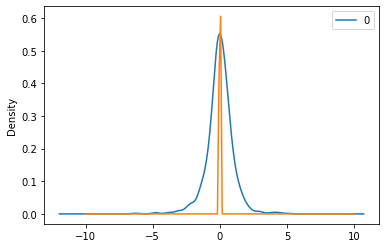

In [ ]:
pd.DataFrame(r_scaled).plot.kde()
x=np.linspace(-10,10,170)
y=scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y)
plt.show()

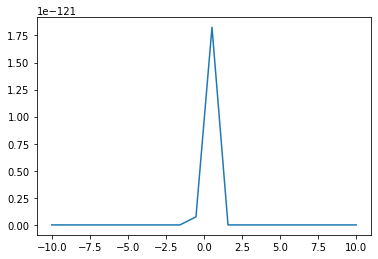

In [ ]:
x=np.linspace(-10,10,20)
y=scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y)
plt.show()

In [ ]:
np.mean(r_scaled)

-4.705581031523842e-18

### 4) Let's generate a Q-Q plot and hence comment on the normality of your asset price log-returns.

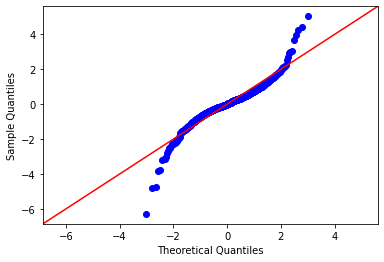

In [ ]:
sm.qqplot(r_scaled, line='45')
plt.show()